Diagonalization of the 3 qubit Hamiltonian and comparison with the approximate diagonalization through $P$

In [17]:
import sympy as sp
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
from sympy import Symbol, sqrt
import numpy as np

omega = Symbol('w')
g_01 = Symbol('$g_{01}$')
g_12 = Symbol('$g_{12}$')

g_01 = Symbol('g')

g_12 = g_01

#H = Matrix([[3*omega, 0, 0, 0, 0, 0, 0, 0],[0, 2*omega, g_12, 0, 0, 0, 0, 0], [0, g_12, 2*omega, g_01, 0, 0, 0, 0],[0, 0, g_01, 2*omega, 0, 0, 0, 0], [0, 0, 0, 0, omega, g_12, 0, 0], [0, 0, 0, 0, g_01, omega, g_12, 0],  [0, 0, 0, 0, 0, g_01, omega, 0],  [0, 0, 0, 0, 0, 0, 0, 0]])
H = Matrix([[0, 0, 0, 0, 0, 0, 0, 0],[0, omega, g_12, 0, 0, 0, 0, 0], [0, g_12, omega, g_01, 0, 0, 0, 0],[0, 0, g_01, omega, 0, 0, 0, 0], [0, 0, 0, 0, 2*omega, g_12, 0, 0], [0, 0, 0, 0, g_01, 2*omega, g_12, 0],  [0, 0, 0, 0, 0, g_01, 2*omega, 0],  [0, 0, 0, 0, 0, 0, 0, 3*omega]])
H

Matrix([
[0, 0, 0, 0,   0,   0,   0,   0],
[0, w, g, 0,   0,   0,   0,   0],
[0, g, w, g,   0,   0,   0,   0],
[0, 0, g, w,   0,   0,   0,   0],
[0, 0, 0, 0, 2*w,   g,   0,   0],
[0, 0, 0, 0,   g, 2*w,   g,   0],
[0, 0, 0, 0,   0,   g, 2*w,   0],
[0, 0, 0, 0,   0,   0,   0, 3*w]])

In [18]:
from sympy.physics.quantum.tensorproduct import TensorProduct
from sympy.matrices import eye

P = Matrix([[1, 0, 0, 0],[0, -1/sqrt(2), 1/sqrt(2), 0],[0, 1/sqrt(2), 1/sqrt(2), 0],[0, 0, 0, 1]])
P_prime = TensorProduct(P, eye(2))*TensorProduct(eye(2), P)
H_prime = sp.simplify(P_prime*H*P_prime.transpose())
H_prime

Matrix([
[0,      0,            0,            0,            0,            0,       0,   0],
[0, -g + w,            0,         -g/2,            0,          g/2,       0,   0],
[0,      0,  g/2 + 3*w/2,            0,   -g/2 + w/2, -sqrt(2)*g/2,     g/2,   0],
[0,   -g/2,            0, -g/2 + 3*w/2, -sqrt(2)*g/2,   -g/2 + w/2,       0,   0],
[0,      0,   -g/2 + w/2, -sqrt(2)*g/2,  g/2 + 3*w/2,            0,     g/2,   0],
[0,    g/2, -sqrt(2)*g/2,   -g/2 + w/2,            0, -g/2 + 3*w/2,       0,   0],
[0,      0,          g/2,            0,          g/2,            0, g + 2*w,   0],
[0,      0,            0,            0,            0,            0,       0, 3*w]])

In [19]:
from sympy import init_printing, latex

init_printing()
latex_code = latex(H_prime)
print(latex_code)

\left[\begin{matrix}0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & - g + w & 0 & - \frac{g}{2} & 0 & \frac{g}{2} & 0 & 0\\0 & 0 & \frac{g}{2} + \frac{3 w}{2} & 0 & - \frac{g}{2} + \frac{w}{2} & - \frac{\sqrt{2} g}{2} & \frac{g}{2} & 0\\0 & - \frac{g}{2} & 0 & - \frac{g}{2} + \frac{3 w}{2} & - \frac{\sqrt{2} g}{2} & - \frac{g}{2} + \frac{w}{2} & 0 & 0\\0 & 0 & - \frac{g}{2} + \frac{w}{2} & - \frac{\sqrt{2} g}{2} & \frac{g}{2} + \frac{3 w}{2} & 0 & \frac{g}{2} & 0\\0 & \frac{g}{2} & - \frac{\sqrt{2} g}{2} & - \frac{g}{2} + \frac{w}{2} & 0 & - \frac{g}{2} + \frac{3 w}{2} & 0 & 0\\0 & 0 & \frac{g}{2} & 0 & \frac{g}{2} & 0 & g + 2 w & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 3 w\end{matrix}\right]


checking now for diagonal dominance


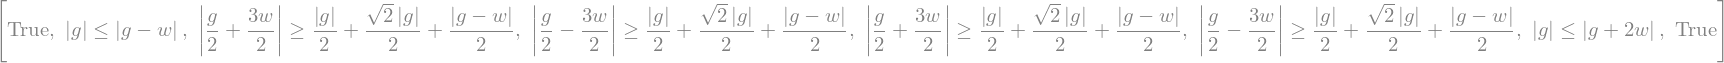

In [20]:
from sympy import Abs, simplify

def is_diagonally_dominant_symbolic(matrix):
    """
    Check if a symbolic matrix is diagonally dominant.
    :param matrix: A SymPy Matrix
    :return: A list of inequalities that must hold for diagonal dominance.
    """
    rows, cols = matrix.shape
    if rows != cols:
        raise ValueError("Matrix must be square")
    
    inequalities = []
    for i in range(rows):
        diag_element = Abs(matrix[i, i])
        row_sum = sum(Abs(matrix[i, j]) for j in range(cols) if j != i)
        inequalities.append(simplify(diag_element >= row_sum))
    
    return inequalities

is_diagonally_dominant_symbolic(H_prime)

for our values of omega and g

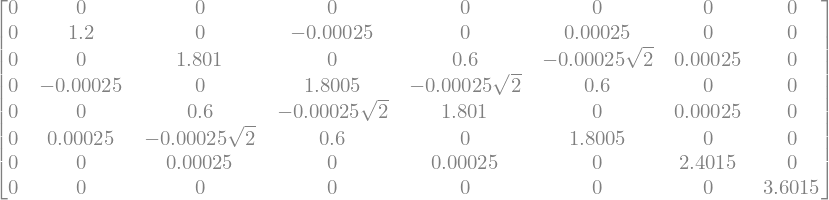

In [52]:
omega_c = 1.1
n = 2
kappa = [0.2]
omega_m = [1.2]*n
g = [0.01]*(2*(n-1))
gamma = [0.8*(10**-6)]*n

delta = [ x - omega_c for x in omega_m ]
omega_eff = [ omega_m[i] + (delta[i]*(g[i]**2))/((0.5*kappa[0])**2 + delta[i]**2) for i in range(n) ]
g_eff = [ (0.5*g[i]*g[i+1]*(delta[i] + delta[i+1]))/((kappa[0]/2)**2 + delta[i]*delta[i+1]) for i in range(n-1) ]
gamma_eff = [ gamma[i] + (kappa[0]*(g[i]**2))/((0.5*kappa[0])**2 + delta[i]**2) for i in range(n) ]
gamma_cross = [ (g[i]*g[i+1]*(kappa[0]))/((kappa[0]/2)**2 + delta[i]*delta[i+1]) for i in range(n-1)]  
gamma_plus = [(gamma_eff[i] + gamma_eff[i+1])/2 + gamma_cross[i] for i in range(n-1)]
gamma_minus = [(gamma_eff[i] + gamma_eff[i+1])/2 - gamma_cross[i] for i in range(n-1)]

omega = Symbol('w')
g_01 = Symbol('$g_{01}$')
g_12 = Symbol('$g_{12}$')

g_01 = Symbol('g')

g_12 = g_01

#H = Matrix([[3*omega, 0, 0, 0, 0, 0, 0, 0],[0, 2*omega, g_12, 0, 0, 0, 0, 0], [0, g_12, 2*omega, g_01, 0, 0, 0, 0],[0, 0, g_01, 2*omega, 0, 0, 0, 0], [0, 0, 0, 0, omega, g_12, 0, 0], [0, 0, 0, 0, g_01, omega, g_12, 0],  [0, 0, 0, 0, 0, g_01, omega, 0],  [0, 0, 0, 0, 0, 0, 0, 0]])
H = Matrix([[0, 0, 0, 0, 0, 0, 0, 0],[0, omega_eff[0], g_eff[0], 0, 0, 0, 0, 0], [0, g_eff[0], omega_eff[0], g_eff[0], 0, 0, 0, 0],[0, 0, g_eff[0], omega_eff[0], 0, 0, 0, 0], [0, 0, 0, 0, 2*omega_eff[0], g_eff[0], 0, 0], [0, 0, 0, 0, g_eff[0], 2*omega_eff[0], g_eff[0], 0],  [0, 0, 0, 0, 0, g_eff[0], 2*omega_eff[0], 0],  [0, 0, 0, 0, 0, 0, 0, 3*omega_eff[0]]])
H

P = Matrix([[1, 0, 0, 0],[0, -1/sqrt(2), 1/sqrt(2), 0],[0, 1/sqrt(2), 1/sqrt(2), 0],[0, 0, 0, 1]])
P_prime = TensorProduct(P, eye(2))*TensorProduct(eye(2), P)
H_prime = sp.simplify(P_prime*H*P_prime.transpose())
H_prime

In [44]:
def is_diagonally_dominant(matrix):
    """
    Check if a matrix is diagonally dominant.
    :param matrix: A SymPy Matrix
    :return: True if the matrix is diagonally dominant, False otherwise
    """
    rows, cols = matrix.shape
    if rows != cols:
        raise ValueError("Matrix must be square")
    
    for i in range(rows):
        diag_element = Abs(matrix[i, i])
        row_sum = sum(Abs(matrix[i, j]) for j in range(cols) if j != i)
        if diag_element < row_sum:
            return False
    return True

is_diagonally_dominant(H_prime)

True

rounding for clarity


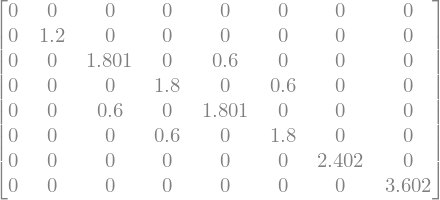

In [53]:
roundMatrix = lambda m, n: Matrix([[round(m[x, y], n) for y in range(m.shape[1])] for x in range(m.shape[0])])
roundMatrix(H_prime, 3)

In [36]:
latex_code = latex(roundMatrix(H_prime, 3))
print(latex_code)

\left[\begin{matrix}0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 1.2 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 1.801 & 0 & 0.6 & 0 & 0 & 0\\0 & 0 & 0 & 1.8 & 0 & 0.6 & 0 & 0\\0 & 0 & 0.6 & 0 & 1.801 & 0 & 0 & 0\\0 & 0 & 0 & 0.6 & 0 & 1.8 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 2.402 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 3.602\end{matrix}\right]


now computing the frobenius norm (distance between the matrices element-wise) as a metric of the approximation accuracy


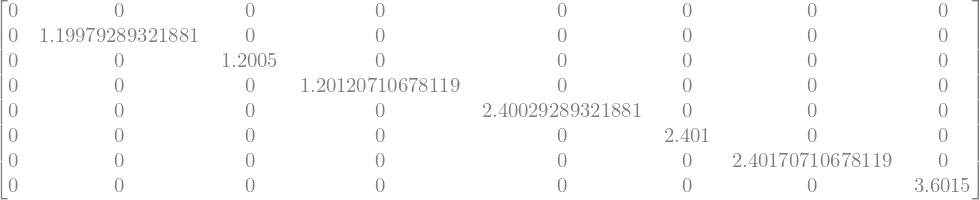

In [54]:
H.diagonalize()[1]

In [55]:
relative_error = (H_prime - H.diagonalize()[1]).norm('fro')/(H.diagonalize()[1].norm('fro'))
relative_error

In [2]:
np.array(H.diagonalize()[0])


array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, -1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, -sqrt(2), 0, sqrt(2), 0],
       [0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, -1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, -sqrt(2), 0, sqrt(2)],
       [0, 0, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0]], dtype=object)

In [ ]:
H = np.array([[3*omega, 0, 0, 0, 0, 0, 0, 0],[0, 2*omega, g_12, 0, 0, 0, 0, 0], [0, g_12, 2*omega, g_01, 0, 0, 0, 0],[0, 0, g_01, 2*omega, 0, 0, 0, 0], [0, 0, 0, 0, omega, g_12, 0, 0], [0, 0, 0, 0, g_01, omega, g_12, 0],  [0, 0, 0, 0, 0, g_01, omega, 0],  [0, 0, 0, 0, 0, 0, 0, 0]])


In [38]:
H.eigenvects()

[(0,
  1,
  [Matrix([
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [1]])]),
 (w,
  1,
  [Matrix([
   [ 0],
   [ 0],
   [ 0],
   [ 0],
   [-1],
   [ 0],
   [ 1],
   [ 0]])]),
 (2*w,
  1,
  [Matrix([
   [ 0],
   [-1],
   [ 0],
   [ 1],
   [ 0],
   [ 0],
   [ 0],
   [ 0]])]),
 (3*w,
  1,
  [Matrix([
   [1],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0]])]),
 (-sqrt(2)*g + w,
  1,
  [Matrix([
   [                        0],
   [                        0],
   [                        0],
   [                        0],
   [                        1],
   [-w/g + (-sqrt(2)*g + w)/g],
   [                        1],
   [                        0]])]),
 (-sqrt(2)*g + 2*w,
  1,
  [Matrix([
   [                            0],
   [                            1],
   [-2*w/g + (-sqrt(2)*g + 2*w)/g],
   [                            1],
   [                            0],
   [                            0],
   [                            0],
   [                            0]])

In [36]:
H.eigenvals()

{3*w: 1,
 2*w: 1,
 -sqrt(2)*g + 2*w: 1,
 sqrt(2)*g + 2*w: 1,
 w: 1,
 -sqrt(2)*g + w: 1,
 sqrt(2)*g + w: 1,
 0: 1}

In [56]:
v1 = np.array([[1,0,0,0,0,0,0,0]]).transpose()
v2 = (1/2)*np.array([[0, 1, np.sqrt(2), 1, 0, 0, 0, 0]]).transpose()
v3 = (1/np.sqrt(2))*np.array([[0, -1, 0, 1, 0, 0, 0, 0]]).transpose()
v4 = (1/2)*np.array([[0, 1, -np.sqrt(2), 1, 0, 0, 0, 0]]).transpose()
v5 = (1/2)*np.array([[0, 0, 0, 0, 1, np.sqrt(2), 1, 0]]).transpose()
v6 = (1/np.sqrt(2))*np.array([[0, 0, 0, 0, -1, 0, 1, 0]]).transpose()
v7 = (1/2)*np.array([[0, 0, 0, 0, 1, -np.sqrt(2), 1, 0]]).transpose()
v8 = np.array([[0,0,0,0,0,0,0,1]]).transpose()
true_P = Matrix(np.hstack((v1, v2, v3, v4, v5, v6, v7, v8)))

(true_P.transpose()*H*true_P)

Matrix([
[3.0*w,                         0,     0,                          0,                         0,     0,                          0, 0],
[    0, 1.4142135623731*g + 2.0*w,     0,    -2.22044604925031e-16*w,                         0,     0,                          0, 0],
[    0,                         0, 2.0*w,                          0,                         0,     0,                          0, 0],
[    0,   -2.22044604925031e-16*w,     0, -1.4142135623731*g + 2.0*w,                         0,     0,                          0, 0],
[    0,                         0,     0,                          0, 1.4142135623731*g + 1.0*w,     0,    -1.11022302462516e-16*w, 0],
[    0,                         0,     0,                          0,                         0, 1.0*w,                          0, 0],
[    0,                         0,     0,                          0,   -1.11022302462516e-16*w,     0, -1.4142135623731*g + 1.0*w, 0],
[    0,                         0,     

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter, Gate, ControlledGate
import numpy as np
from qiskit.quantum_info import Operator, Statevector
from qiskit.circuit.library import RYGate, RYYGate, Initialize

def true_basis_change(n:int, omega_m:list, omega_c:list, g:list, gamma:list, kappa:list, initial_state:list, r:int):

    n = 3

    delta = [ x - omega_c for x in omega_m ]
    
    omega_eff = [ omega_m[i] + (delta[i]*(g[i]**2))/((0.5*kappa[0])**2 + delta[i]**2) for i in range(n) ]
    
    g_eff = [ (0.5*g[i]*g[i+1]*(delta[i] + delta[i+1]))/((kappa[0]/2)**2 + delta[i]*delta[i+1]) for i in range(n-1) ]

    gamma_eff = [ gamma[i] + (kappa[0]*(g[i]**2))/((0.5*kappa[0])**2 + delta[i]**2) for i in range(n) ]

    gamma_cross = [ (g[i]*g[i+1]*(kappa[0]))/((kappa[0]/2)**2 + delta[i]*delta[i+1]) for i in range(n-1)]  
    
    gamma_plus = [(gamma_eff[i] + gamma_eff[i+1])/2 + gamma_cross[i] for i in range(n-1)]

    gamma_minus = [(gamma_eff[i] + gamma_eff[i+1])/2 - gamma_cross[i] for i in range(n-1)]

    system = QuantumRegister(n, 'q')
    environment = QuantumRegister(n, 'e')

    # Parameter definition

    delta_t = Parameter('$t$')/r

    beta = [ 2*omega_eff[j]*delta_t for j in range(n) ]

    alpha = [ g_eff[j]*delta_t for j in range(n-1) ]

    theta_plus = [ (((1 - (-delta_t*gamma_plus[j]).exp())**(1/2)).arcsin())*2 for j in range(n-1)]

    theta_minus = [ (((1 - (-delta_t*gamma_minus[j]).exp())**(1/2)).arcsin())*2 for j in range(n-1)]

    init = QuantumCircuit(system, environment)
    
    initial_qubit_state = initial_state    

    initial_statevector = Statevector(initial_qubit_state) 

    init.initialize(params = initial_statevector, qubits = system, normalize = True)

    u_0 = QuantumCircuit(system, environment)

    for i in range(n):

        u_0.rz(beta[i], system[i])

    # Two-layer interaction circuit

    
    u1 = QuantumCircuit(system, environment)

    for j in range(0, n-1, 2):

        u1.ryy(alpha[j], qubit1 = system[j], qubit2 = system[j+1])
        u1.rxx(alpha[j], qubit1 = system[j], qubit2 = system[j+1])

    if n > 2:

        u2 = QuantumCircuit(system, environment)

        for k in range(1, n-1, 2):

            u2.ryy(alpha[k], qubit1 = system[k], qubit2 = system[k+1])
            u2.rxx(alpha[k], qubit1 = system[k], qubit2 = system[k+1])

        u_int = u1.compose(u2)

    else:

        u_int = u1

    u_decay_first_layer = QuantumCircuit(system, environment)

    # Basis change gate definition

    true_P = np.array([[1, 0, 0, 0], [0, -1/np.sqrt(2), 1/np.sqrt(2), 0], [0, 1/np.sqrt(2), 1/np.sqrt(2), 0], [0, 0, 0, 1]])

    true_P_gate = Operator(true_P).to_instruction()

    true_P_dag_gate = Operator(true_P.transpose()).to_instruction()

    # Now we do the same as before just changing the two-layered P by the true P.

    u_decay_first_layer.append(true_P_gate, [system[0], system[1], system[2]])

    for j in range(0, n-1, 2):

        ccry_plus = RYGate(theta_plus[j] - theta_minus[j]).control(2)

        ccry_minus = RYGate(theta_minus[j] - theta_plus[j]).control(2)

        u_decay_first_layer.append(ccry_plus, [system[j], system[j+1], environment[j]])

        u_decay_first_layer.append(ccry_minus, [system[j], system[j+1], environment[j+1]])

        u_decay_first_layer.cry(theta_minus[j], system[j], environment[j])

        u_decay_first_layer.cry(theta_plus[j], system[j+1], environment[j+1])

        u_decay_first_layer.cx(environment[j], system[j])

        u_decay_first_layer.cx(environment[j+1], system[j+1])

        u_decay_first_layer.reset([environment[j], environment[j+1]])
    
    # And onto the second layer

    if n > 2:

        u_decay_second_layer = QuantumCircuit(system, environment)

        for j in range(1, n-1, 2):

            ccry_plus = RYGate(theta_plus[j] - theta_minus[j]).control(2)

            ccry_minus = RYGate(theta_minus[j] - theta_plus[j]).control(2)

            u_decay_second_layer.append(ccry_plus, [system[j], system[j+1], environment[j]])

            u_decay_second_layer.append(ccry_minus, [system[j], system[j+1], environment[j+1]])

            u_decay_second_layer.cry(theta_minus[j], system[j], environment[j])

            u_decay_second_layer.cry(theta_plus[j], system[j+1], environment[j+1])

            u_decay_second_layer.cx(environment[j], system[j])

            u_decay_second_layer.cx(environment[j+1], system[j+1])

            u_decay_second_layer.reset([environment[j], environment[j+1]])

        u_decay_second_layer.append(true_P_dag_gate, [system[0], system[1], system[2]])
        u_decay = u_decay_first_layer.compose(u_decay_second_layer)

    else:

        u_decay = u_decay_first_layer


    # Putting everything (except the initialization) together
    # for Trotterization

    u = ((u_0.compose(u_int)).compose(u_decay))

    trotterized_u = u.repeat(r).decompose()

    # Finally, we put the initialization right at the beginning.
    
    parametrized_qc = trotterized_u.compose(init, front = True)

    return parametrized_qc

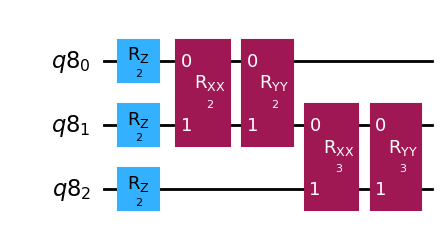

In [153]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister

system = QuantumRegister(3)

omega = 1
g_01 = 2
g_12 = 3

qc = QuantumCircuit(system)

beta = 2*omega
alpha_01 = g_01
alpha_12 = g_12

qc.rz(beta, system)
qc.rxx(alpha_01, system[0], system[1])
qc.ryy(alpha_01, system[0], system[1])
qc.rxx(alpha_12, system[1], system[2])
qc.ryy(alpha_12, system[1], system[2])

a = qc.repeat(10)
qc.draw('mpl')

In [182]:
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import SparsePauliOp

r = 1
omega = 1

H_0 = (1/r)*omega*1/2*(SparsePauliOp('III') + SparsePauliOp('IIZ') + SparsePauliOp('III') + SparsePauliOp('IZI') + SparsePauliOp('III') + SparsePauliOp('ZII'))
#H_int = (1/r)*0.5*g_01*(SparsePauliOp('IXX') + SparsePauliOp('IYY')) #+ 0.5*g_12*(SparsePauliOp('XXI') + SparsePauliOp('YYI'))
H_int = 0.5*g_12*(SparsePauliOp('XXI') + SparsePauliOp('YYI'))
u_0 = PauliEvolutionGate(H_0, time = 1)
u_int = PauliEvolutionGate(H_int, time = 1)

qc = QuantumCircuit(system)
qc.append(u_0, system)
#qc.append(u_int, system)
#qc_trott = qc.repeat(r)
#qc.decompose().decompose().draw('mpl')

In [183]:
from qiskit.quantum_info import Operator

a = Operator.from_circuit(qc)
a.draw('latex')

<IPython.core.display.Latex object>

In [184]:

b = a.to_matrix()
arguments = np.zeros((8,8))

for i in range(8):
    for j in range(8):

        if (b[i][j] - 0)==0 :

            arguments[i][j] = b[i][j]

        else:

            r, theta = cmath.polar(b[i][j])
            arguments[i][j] = -round(theta,2)
    
arguments
            

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_31120\2162258693.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  arguments[i][j] = b[i][j]


array([[3., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [180]:
from sympy import Matrix, Symbol
from sympy.physics.quantum import TensorProduct
identity = Matrix([[1, 0],[0, 1]])

ket_0 = Matrix([[1],[0]])
ket_1 = Matrix([[0],[1]])

sigma = ket_0*ket_1.transpose()
sigma_1 = TensorProduct(sigma, identity, identity)
sigma_2 = TensorProduct(identity, sigma, identity)
sigma_3 = TensorProduct(identity, identity, sigma)

omega = Symbol('w')
g = Symbol('g')

H = omega*(sigma_1.transpose()*sigma_1 + sigma_2.transpose()*sigma_2 + sigma_3.transpose()*sigma_3)+ g*(sigma_1.transpose()*sigma_2 + sigma_1*sigma_2.transpose() + sigma_2.transpose()*sigma_3 + sigma_2*sigma_3.transpose())
H

Matrix([
[0, 0, 0,   0, 0,   0,   0,   0],
[0, w, g,   0, 0,   0,   0,   0],
[0, g, w,   0, g,   0,   0,   0],
[0, 0, 0, 2*w, 0,   g,   0,   0],
[0, 0, g,   0, w,   0,   0,   0],
[0, 0, 0,   g, 0, 2*w,   g,   0],
[0, 0, 0,   0, 0,   g, 2*w,   0],
[0, 0, 0,   0, 0,   0,   0, 3*w]])

In [194]:
diag = np.diagonal(H)

# Reverse the diagonal elements
reversed_diag = diag[::-1]

# Create a copy of the original matrix to modify
reversed_matrix = np.array(H).copy()

# Replace the diagonal with the reversed diagonal
np.fill_diagonal(reversed_matrix, reversed_diag)
reversed_matrix

# THIS MATRIX MATCHES QISKITS ORDERING (the same as sympys ordering but with a reversed diagonal)

array([[3*w, 0, 0, 0, 0, 0, 0, 0],
       [0, 2*w, g, 0, 0, 0, 0, 0],
       [0, g, 2*w, 0, g, 0, 0, 0],
       [0, 0, 0, w, 0, g, 0, 0],
       [0, 0, g, 0, 2*w, 0, 0, 0],
       [0, 0, 0, g, 0, w, g, 0],
       [0, 0, 0, 0, 0, g, w, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [193]:
reversed_diag

array([3*w, 2*w, 2*w, w, 2*w, w, w, 0], dtype=object)

In [79]:
import cmath

r, theta = cmath.polar(complex(-0.989, -0.1411))
print(f'{r}*exp(i{theta})')

0.9990146195126476*exp(i-2.9998796280884625)


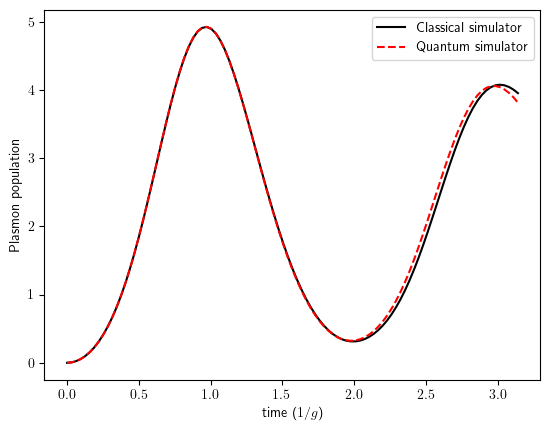

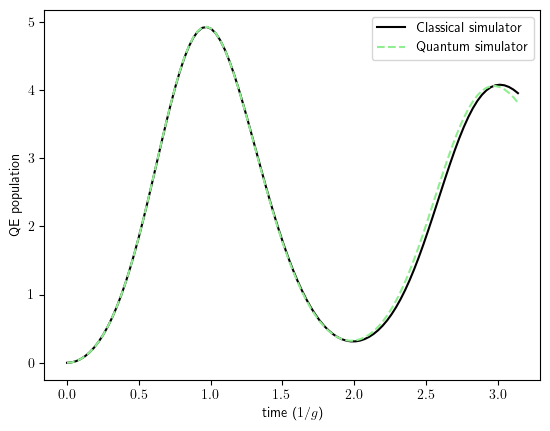

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

t = np.loadtxt("emitters_6_nsteps10.txt")[:, 0]
adag_a = np.loadtxt("emitters_6_nsteps10.txt")[:, 1]
sgimaplus_simgamm = np.loadtxt("emitters_6_nsteps10.txt")[:, 2]
adag_a_qutip = np.loadtxt("emitters_6_nsteps10.txt")[:, 3]
sgimaplus_simgamm_qutip = np.loadtxt("emitters_6_nsteps10.txt")[:, 4]

plt.plot(t, adag_a_qutip, color = 'black', linestyle = 'solid', label = 'Classical simulator')
plt.plot(t, adag_a, color = 'red', linestyle = 'dashed', label = 'Quantum simulator')
plt.xlabel('time ($1/g$)')
plt.ylabel('Plasmon population')
plt.legend()
plt.savefig('plasmon pop jonny 6 emitters')
plt.show()

plt.plot(t, adag_a_qutip, color = 'black', linestyle = 'solid', label = 'Classical simulator')
plt.plot(t, adag_a, color = 'lightgreen', linestyle = 'dashed', label = 'Quantum simulator')
plt.xlabel('time ($1/g$)')
plt.ylabel('QE population')
plt.legend()
plt.savefig('molecule pop jonny 6 emitters')
plt.show()

In [5]:
import sympy as sp
from sympy import Matrix
from sympy import Symbol
import numpy as np

rho_00 = Symbol('$\\rho_{00}$')
rho_01 = Symbol('$\\rho_{01}$')
rho_10 = Symbol('$\\rho_{10}$')
rho_11 = Symbol('$\\rho_{11}$')

gamma = Symbol('$\\gamma$')

rho = Matrix([[rho_00, rho_01],[rho_10, rho_11]])
sigma = Matrix([[0, 1],[0, 0]])
sigmapm = sigma.transpose()*sigma

D = gamma*(sigma*rho*sigma.transpose() - 0.5*(sigmapm*rho + rho*sigmapm))
print(D)

Matrix([[$\gamma$*$\rho_{11}$, -0.5*$\gamma$*$\rho_{01}$], [-0.5*$\gamma$*$\rho_{10}$, -1.0*$\gamma$*$\rho_{11}$]])


In [2]:
import sympy as sp
from sympy import Matrix
from sympy import Symbol
import numpy as np

rho_00 = Symbol('$\\rho_{00}$')
rho_01 = Symbol('$\\rho_{01}$')
rho_10 = Symbol('$\\rho_{10}$')
rho_11 = Symbol('$\\rho_{11}$')

lam = Symbol('$\\Lambda$')

rho = Matrix([[rho_00, rho_01],[rho_10, rho_11]])
sigma = Matrix([[0, 1],[0, 0]])
sigmamp = sigma*sigma.transpose()

D = lam*(sigma.transpose()*rho*sigma - 0.5*(sigmamp*rho + rho*sigmamp))
print(D)

Matrix([[-1.0*$\Lambda$*$\rho_{00}$, -0.5*$\Lambda$*$\rho_{01}$], [-0.5*$\Lambda$*$\rho_{10}$, $\Lambda$*$\rho_{00}$]])


getting delRe kraus operators

In [99]:
from get_kraus_TEST import get_kraus, get_unitary
from sympy import Matrix, Symbol, sqrt
from sympy.physics.quantum import TensorProduct

p_0 = Symbol('p_0')
p_1 = Symbol('p_1')

ket_0 = Matrix([[1],[0]])
ket_1 = Matrix([[0],[1]])

ket_00 = TensorProduct(ket_0, ket_0)
ket_01 = TensorProduct(ket_0, ket_1)
ket_10 = TensorProduct(ket_1, ket_0)
ket_11 = TensorProduct(ket_1, ket_1)


first_prime = sqrt(1-p_0)*TensorProduct(ket_0, ket_00) + sqrt(p_0)*TensorProduct(ket_1, ket_01)
second_prime = sqrt(1-p_1)*TensorProduct(ket_1, ket_00) + sqrt(p_1)*TensorProduct(ket_0, ket_10)

transformed_kets = [first_prime, second_prime]
basis = 'computational'

kraus = get_kraus(transformed_kets, basis)
u = get_unitary(kraus, basis)
kraus

The channel is CPTP


[Matrix([
 [sqrt(1 - p_0),             0],
 [            0, sqrt(1 - p_1)]]),
 Matrix([
 [        0, 0],
 [sqrt(p_0), 0]]),
 Matrix([
 [0, sqrt(p_1)],
 [0,         0]]),
 Matrix([
 [0, 0],
 [0, 0]])]

and computing the evolved density matrix

In [103]:
import sympy as sp
from sympy import Matrix, Symbol, sqrt
import numpy as np

rho_00 = Symbol('$\\rho_{00}$')
rho_01 = Symbol('$\\rho_{01}$')
rho_10 = Symbol('$\\rho_{10}$')
rho_11 = Symbol('$\\rho_{11}$')

p_1 = Symbol('$p_{1}$')
p_2 = Symbol('$p_{2}$')

rho = Matrix([[rho_00, rho_01],[rho_10, rho_11]])

k_0 = Matrix([[sqrt(1-p_1), 0], [0, sqrt(1-p_2)]])
k_1 = Matrix([[0, 0],[sqrt(p_1), 0]])
k_2 = Matrix([[0, sqrt(p_2)],[0, 0]])

rho_evolved = k_0*rho*k_0.transpose() + k_1*rho*k_1.transpose() + k_2*rho*k_2.transpose()
print(sp.simplify(rho_evolved))

Matrix([[-$\rho_{00}$*($p_{1}$ - 1) + $\rho_{11}$*$p_{2}$, $\rho_{01}$*sqrt(1 - $p_{1}$)*sqrt(1 - $p_{2}$)], [$\rho_{10}$*sqrt(1 - $p_{1}$)*sqrt(1 - $p_{2}$), $\rho_{00}$*$p_{1}$ - $\rho_{11}$*($p_{2}$ - 1)]])


now doing the same for my circuit

In [2]:
from get_kraus_TEST import get_kraus, get_unitary
from sympy import Matrix, Symbol, sqrt
from sympy.physics.quantum import TensorProduct

system_dim = 2
ancilla_dim = 2

p_1 = Symbol('p_1')
p_2 = Symbol('p_2')

ket_0 = Matrix([[1],[0]])
ket_1 = Matrix([[0],[1]])

first_prime = sqrt(1-p_1)*TensorProduct(ket_0, ket_0) + sqrt(p_1)*TensorProduct(ket_1, ket_1)
second_prime = sqrt(1-p_2)*TensorProduct(ket_1, ket_0) + sqrt(p_2)*TensorProduct(ket_0, ket_1)

transformed_kets = [first_prime, second_prime]
basis = 'computational'

kraus = get_kraus(transformed_kets, basis, system_dim, ancilla_dim)
u = get_unitary(kraus, basis)
kraus

The channel is CPTP


[Matrix([
 [sqrt(1 - p_1),             0],
 [            0, sqrt(1 - p_2)]]),
 Matrix([
 [        0, sqrt(p_2)],
 [sqrt(p_1),         0]])]

In [3]:
import sympy as sp
from sympy import Matrix, Symbol, sqrt
import numpy as np

rho_00 = Symbol('$\\rho_{00}$')
rho_01 = Symbol('$\\rho_{01}$')
rho_10 = Symbol('$\\rho_{10}$')
rho_11 = Symbol('$\\rho_{11}$')

p_1 = Symbol('$p_{1}$')
p_2 = Symbol('$p_{2}$')

rho = Matrix([[rho_00, rho_01],[rho_10, rho_11]])

k_0 = Matrix([[sqrt(1-p_1), 0], [0, sqrt(1-p_2)]])
k_1 = Matrix([[0, sqrt(p_2)],[sqrt(p_1), 0]])

rho_evolved = k_0*rho*k_0.transpose() + k_1*rho*k_1.transpose() 
print(sp.simplify(rho_evolved))

Matrix([[-$\rho_{00}$*($p_{1}$ - 1) + $\rho_{11}$*$p_{2}$, $\rho_{01}$*sqrt(1 - $p_{1}$)*sqrt(1 - $p_{2}$) + $\rho_{10}$*sqrt($p_{1}$)*sqrt($p_{2}$)], [$\rho_{01}$*sqrt($p_{1}$)*sqrt($p_{2}$) + $\rho_{10}$*sqrt(1 - $p_{1}$)*sqrt(1 - $p_{2}$), $\rho_{00}$*$p_{1}$ - $\rho_{11}$*($p_{2}$ - 1)]])


calculando el efecto de los disipadores cruzados en la matriz densidad

In [19]:
import sympy as sp
from sympy import Matrix, Symbol, sqrt
import numpy as np

rho_00 = Symbol('$\\rho_{00}$')
rho_01 = Symbol('$\\rho_{01}$')
rho_02 = Symbol('$\\rho_{02}$')
rho_03 = Symbol('$\\rho_{03}$')

rho_10 = Symbol('$\\rho_{10}$')
rho_11 = Symbol('$\\rho_{11}$')
rho_12 = Symbol('$\\rho_{12}$')
rho_13 = Symbol('$\\rho_{13}$')

rho_20 = Symbol('$\\rho_{20}$')
rho_21 = Symbol('$\\rho_{21}$')
rho_22 = Symbol('$\\rho_{22}$')
rho_23 = Symbol('$\\rho_{23}$')

rho_30 = Symbol('$\\rho_{30}$')
rho_31 = Symbol('$\\rho_{31}$')
rho_32 = Symbol('$\\rho_{32}$')
rho_33 = Symbol('$\\rho_{33}$')


rho = Matrix([[rho_00, rho_01, rho_02, rho_03],[rho_10, rho_11, rho_12, rho_13], [rho_20, rho_21, rho_22, rho_23], [rho_30, rho_31, rho_32, rho_33]])

#P = Matrix([[1, 0, 0, 0], [0, -1/np.sqrt(2), 1/np.sqrt(2), 0], [0, 1/np.sqrt(2), 1/np.sqrt(2), 0], [0, 0, 0, 1]])

#rho_prime = P.transpose()*rho*P
print(rho)

Matrix([[$\rho_{00}$, $\rho_{01}$, $\rho_{02}$, $\rho_{03}$], [$\rho_{10}$, $\rho_{11}$, $\rho_{12}$, $\rho_{13}$], [$\rho_{20}$, $\rho_{21}$, $\rho_{22}$, $\rho_{23}$], [$\rho_{30}$, $\rho_{31}$, $\rho_{32}$, $\rho_{33}$]])


In [20]:
gr = Matrix([[1],[0],[0],[0]])
lambda_minus = Matrix([[0],[1],[0],[0]])
lambda_plus = Matrix([[0],[0],[1],[0]])
e = Matrix([[0],[0],[0],[1]])

# Operators definition

sigma_gplus = gr*lambda_plus.transpose()
sigma_gminus = gr*lambda_minus.transpose()
sigma_pluse = lambda_plus*e.transpose()
sigma_minuse = lambda_minus*e.transpose()

# Dissipator

d_gplus_pluse = sigma_gplus*rho*sigma_pluse.transpose() - 0.5*(sigma_pluse.transpose()*sigma_gplus*rho + rho*sigma_pluse.transpose()*sigma_gplus)
#d_gplus_pluse = sigma_gplus*rho*sigma_pluse.transpose() - 0.5*(sigma_pluse.transpose()*sigma_gplus*rho + rho*sigma_pluse.transpose()*sigma_gplus)
print(sp.simplify(d_gplus_pluse))

Matrix([[0, 0, $\rho_{23}$, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])


calculando ahora el efecto de los 4 disipadores diagonales en la matriz densidad

In [26]:
import sympy as sp
from sympy import Matrix, Symbol, sqrt
import numpy as np

rho_00 = Symbol('$p_{00}$')
rho_01 = Symbol('$p_{01}$')
rho_02 = Symbol('$p_{02}$')
rho_03 = Symbol('$p_{03}$')

rho_10 = Symbol('$p_{10}$')
rho_11 = Symbol('$p_{11}$')
rho_12 = Symbol('$p_{12}$')
rho_13 = Symbol('$p_{13}$')

rho_20 = Symbol('$p_{20}$')
rho_21 = Symbol('$p_{21}$')
rho_22 = Symbol('$p_{22}$')
rho_23 = Symbol('$p_{23}$')

rho_30 = Symbol('$p_{30}$')
rho_31 = Symbol('$p_{31}$')
rho_32 = Symbol('$p_{32}$')
rho_33 = Symbol('$p_{33}$')


rho = Matrix([[rho_00, rho_01, rho_02, rho_03],[rho_10, rho_11, rho_12, rho_13], [rho_20, rho_21, rho_22, rho_23], [rho_30, rho_31, rho_32, rho_33]])

gr = Matrix([[1],[0],[0],[0]])
lambda_minus = Matrix([[0],[1],[0],[0]])
lambda_plus = Matrix([[0],[0],[1],[0]])
e = Matrix([[0],[0],[0],[1]])

# Operators definition

sigma_gplus = gr*lambda_plus.transpose()
sigma_gminus = gr*lambda_minus.transpose()
sigma_pluse = lambda_plus*e.transpose()
sigma_minuse = lambda_minus*e.transpose()

# Decay constants

gamma_plus = Symbol('$g_{+}$')
gamma_minus = Symbol('$g_{-}$')

# Dissipators

d_gplus = gamma_plus*(sigma_gplus*rho*sigma_gplus.transpose() - 0.5*(sigma_gplus.transpose()*sigma_gplus*rho + rho*sigma_gplus.transpose()*sigma_gplus))
d_gminus = gamma_minus*(sigma_gminus*rho*sigma_gminus.transpose() - 0.5*(sigma_gminus.transpose()*sigma_gminus*rho + rho*sigma_gminus.transpose()*sigma_gminus))
d_pluse = gamma_plus*(sigma_pluse*rho*sigma_pluse.transpose() - 0.5*(sigma_pluse.transpose()*sigma_pluse*rho + rho*sigma_pluse.transpose()*sigma_pluse))
d_minuse = gamma_minus*(sigma_minuse*rho*sigma_minuse.transpose() - 0.5*(sigma_minuse.transpose()*sigma_minuse*rho + rho*sigma_minuse.transpose()*sigma_minuse))

evolved_rho = d_gplus + d_gminus + d_pluse + d_minuse
final_rho = sp.simplify(evolved_rho)
print(final_rho)
#print(sp.simplify(evolved_rho))

Matrix([[$g_{+}$*$p_{22}$ + $g_{-}$*$p_{11}$, -0.5*$g_{-}$*$p_{01}$, -0.5*$g_{+}$*$p_{02}$, 0.5*$p_{03}$*(-$g_{+}$ - $g_{-}$)], [-0.5*$g_{-}$*$p_{10}$, $g_{-}$*(-1.0*$p_{11}$ + $p_{33}$), 0.5*$p_{12}$*(-$g_{+}$ - $g_{-}$), $p_{13}$*(-0.5*$g_{+}$ - 1.0*$g_{-}$)], [-0.5*$g_{+}$*$p_{20}$, 0.5*$p_{21}$*(-$g_{+}$ - $g_{-}$), $g_{+}$*(-1.0*$p_{22}$ + $p_{33}$), $p_{23}$*(-1.0*$g_{+}$ - 0.5*$g_{-}$)], [0.5*$p_{30}$*(-$g_{+}$ - $g_{-}$), $p_{31}$*(-0.5*$g_{+}$ - 1.0*$g_{-}$), $p_{32}$*(-1.0*$g_{+}$ - 0.5*$g_{-}$), 1.0*$p_{33}$*(-$g_{+}$ - $g_{-}$)]])


action of P on the density matrix

In [30]:
import sympy as sp
from sympy import Matrix, Symbol, sqrt
import numpy as np

rho_00 = Symbol('$\\rho_{00}$')
rho_01 = Symbol('$\\rho_{01}$')
rho_02 = Symbol('$\\rho_{02}$')
rho_03 = Symbol('$\\rho_{03}$')

rho_10 = Symbol('$\\rho_{10}$')
rho_11 = Symbol('$\\rho_{11}$')
rho_12 = Symbol('$\\rho_{12}$')
rho_13 = Symbol('$\\rho_{13}$')

rho_20 = Symbol('$\\rho_{20}$')
rho_21 = Symbol('$\\rho_{21}$')
rho_22 = Symbol('$\\rho_{22}$')
rho_23 = Symbol('$\\rho_{23}$')

rho_30 = Symbol('$\\rho_{30}$')
rho_31 = Symbol('$\\rho_{31}$')
rho_32 = Symbol('$\\rho_{32}$')
rho_33 = Symbol('$\\rho_{33}$')


rho = Matrix([[rho_00, rho_01, rho_02, rho_03],[rho_10, rho_11, rho_12, rho_13], [rho_20, rho_21, rho_22, rho_23], [rho_30, rho_31, rho_32, rho_33]])

P = Matrix([[1, 0, 0, 0], [0, -1/np.sqrt(2), 1/np.sqrt(2), 0], [0, 1/np.sqrt(2), 1/np.sqrt(2), 0], [0, 0, 0, 1]])

rho_prime = P.transpose()*rho*P
print(rho_prime)

Matrix([[$\rho_{00}$, -0.707106781186547*$\rho_{01}$ + 0.707106781186547*$\rho_{02}$, 0.707106781186547*$\rho_{01}$ + 0.707106781186547*$\rho_{02}$, $\rho_{03}$], [-0.707106781186547*$\rho_{10}$ + 0.707106781186547*$\rho_{20}$, 0.5*$\rho_{11}$ - 0.5*$\rho_{12}$ - 0.5*$\rho_{21}$ + 0.5*$\rho_{22}$, -0.5*$\rho_{11}$ - 0.5*$\rho_{12}$ + 0.5*$\rho_{21}$ + 0.5*$\rho_{22}$, -0.707106781186547*$\rho_{13}$ + 0.707106781186547*$\rho_{23}$], [0.707106781186547*$\rho_{10}$ + 0.707106781186547*$\rho_{20}$, -0.5*$\rho_{11}$ + 0.5*$\rho_{12}$ - 0.5*$\rho_{21}$ + 0.5*$\rho_{22}$, 0.5*$\rho_{11}$ + 0.5*$\rho_{12}$ + 0.5*$\rho_{21}$ + 0.5*$\rho_{22}$, 0.707106781186547*$\rho_{13}$ + 0.707106781186547*$\rho_{23}$], [$\rho_{30}$, -0.707106781186547*$\rho_{31}$ + 0.707106781186547*$\rho_{32}$, 0.707106781186547*$\rho_{31}$ + 0.707106781186547*$\rho_{32}$, $\rho_{33}$]])


getting the Kraus representation of my two emitter quantum circuit

In [25]:
import sys
sys.path.append(r'C:\Users\Benjamin\iCloudDrive\PhD\Quantum Computing\dissipative dynamics')
from utils.get_kraus_TEST import get_kraus
from sympy import Matrix, Symbol, sqrt
from sympy.physics.quantum import TensorProduct

ancilla_dim = 4
system_dim = 4

p_plus = Symbol('p_{+}')
p_minus = Symbol('p_{-}')

ket_0 = Matrix([[1],[0]])
ket_1 = Matrix([[0],[1]])

ket_00 = TensorProduct(ket_0, ket_0)
ket_01 = TensorProduct(ket_0, ket_1)
ket_10 = TensorProduct(ket_1, ket_0)
ket_11 = TensorProduct(ket_1, ket_1)


first_prime = TensorProduct(ket_00, ket_00) 
second_prime = sqrt(1-p_minus)*TensorProduct(ket_01, ket_00) + sqrt(p_minus)*TensorProduct(ket_00, ket_01)
third_prime = sqrt(1-p_plus)*TensorProduct(ket_10, ket_00) + sqrt(p_plus)*TensorProduct(ket_00, ket_10)
fourth_prime = sqrt(1-p_minus)*sqrt(1-p_plus)*TensorProduct(ket_11, ket_00) + sqrt(1 - p_plus)*sqrt(p_minus)*TensorProduct(ket_10, ket_01) + sqrt(1 - p_minus)*sqrt(p_plus)*TensorProduct(ket_01, ket_10) +sqrt(p_minus)*sqrt(p_plus)*TensorProduct(ket_00, ket_11) 

transformed_kets = [first_prime, second_prime, third_prime, fourth_prime]
basis = 'computational'

kraus = get_kraus(transformed_kets, basis, system_dim, ancilla_dim)
#u = get_unitary(kraus, basis)
kraus

The channel is CPTP


[Matrix([
 [1,               0,               0,                               0],
 [0, sqrt(1 - p_{-}),               0,                               0],
 [0,               0, sqrt(1 - p_{+}),                               0],
 [0,               0,               0, sqrt(1 - p_{+})*sqrt(1 - p_{-})]]),
 Matrix([
 [0, sqrt(p_{-}), 0,                           0],
 [0,           0, 0,                           0],
 [0,           0, 0, sqrt(p_{-})*sqrt(1 - p_{+})],
 [0,           0, 0,                           0]]),
 Matrix([
 [0, 0, sqrt(p_{+}),                           0],
 [0, 0,           0, sqrt(p_{+})*sqrt(1 - p_{-})],
 [0, 0,           0,                           0],
 [0, 0,           0,                           0]]),
 Matrix([
 [0, 0, 0, sqrt(p_{+})*sqrt(p_{-})],
 [0, 0, 0,                       0],
 [0, 0, 0,                       0],
 [0, 0, 0,                       0]])]

In [27]:
import sympy as sp
from sympy import Matrix, Symbol, sqrt
import numpy as np

rho_00 = Symbol('$\\rho_{00}$')
rho_01 = Symbol('$\\rho_{01}$')
rho_02 = Symbol('$\\rho_{02}$')
rho_03 = Symbol('$\\rho_{03}$')

rho_10 = Symbol('$\\rho_{10}$')
rho_11 = Symbol('$\\rho_{11}$')
rho_12 = Symbol('$\\rho_{12}$')
rho_13 = Symbol('$\\rho_{13}$')

rho_20 = Symbol('$\\rho_{20}$')
rho_21 = Symbol('$\\rho_{21}$')
rho_22 = Symbol('$\\rho_{22}$')
rho_23 = Symbol('$\\rho_{23}$')

rho_30 = Symbol('$\\rho_{30}$')
rho_31 = Symbol('$\\rho_{31}$')
rho_32 = Symbol('$\\rho_{32}$')
rho_33 = Symbol('$\\rho_{33}$')


rho = Matrix([[rho_00, rho_01, rho_02, rho_03],[rho_10, rho_11, rho_12, rho_13], [rho_20, rho_21, rho_22, rho_23], [rho_30, rho_31, rho_32, rho_33]])

evolved_rho = kraus[0]*rho*kraus[0].transpose() + kraus[1]*rho*kraus[1].transpose() + kraus[2]*rho*kraus[2].transpose() + kraus[3]*rho*kraus[3].transpose()
print(sp.simplify(evolved_rho))

Matrix([[$\rho_{00}$ + $\rho_{11}$*p_{-} + $\rho_{22}$*p_{+} + $\rho_{33}$*p_{+}*p_{-}, sqrt(1 - p_{-})*($\rho_{01}$ + $\rho_{23}$*p_{+}), sqrt(1 - p_{+})*($\rho_{02}$ + $\rho_{13}$*p_{-}), $\rho_{03}$*sqrt(1 - p_{+})*sqrt(1 - p_{-})], [sqrt(1 - p_{-})*($\rho_{10}$ + $\rho_{32}$*p_{+}), (-$\rho_{11}$ - $\rho_{33}$*p_{+})*(p_{-} - 1), $\rho_{12}$*sqrt(1 - p_{+})*sqrt(1 - p_{-}), $\rho_{13}$*sqrt(1 - p_{+})*(1 - p_{-})], [sqrt(1 - p_{+})*($\rho_{20}$ + $\rho_{31}$*p_{-}), $\rho_{21}$*sqrt(1 - p_{+})*sqrt(1 - p_{-}), (-$\rho_{22}$ - $\rho_{33}$*p_{-})*(p_{+} - 1), $\rho_{23}$*(1 - p_{+})*sqrt(1 - p_{-})], [$\rho_{30}$*sqrt(1 - p_{+})*sqrt(1 - p_{-}), $\rho_{31}$*sqrt(1 - p_{+})*(1 - p_{-}), $\rho_{32}$*(1 - p_{+})*sqrt(1 - p_{-}), $\rho_{33}$*(p_{+} - 1)*(p_{-} - 1)]])


And now computing the effect of this channel onto the density matrix

In [1]:
from sampler_solver_WORKS_one_ancilla import sampler_solver
from merge_methods_CHAIN import solve_master_equation
from efficient_qiskit_solver_markovian_CHAIN import markovian_qiskit_solver
import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
import colorsys
from generate_complementary_colors import generate_complementary_colors
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

omega_c = 1.1
n = 2
kappa = [0.2]
omega_m = [1.1, 1.3]
g = [0.01]*(2*(n-1))
gamma = [0.8*(10**-6)]*n
initial_state = [0]*(2**n)
initial_state[-1] = 1

t = np.linspace(0, 750, 250)
r = 5

backend = AerSimulator()
optimization_level = 0
options = {'default_shots' : 10**3}

evs_ancilla = sampler_solver(n, omega_m, omega_c, gamma, g, kappa, t, r, initial_state, backend, optimization_level, options, 'one ancilla')
evs_markov = solve_master_equation(n, omega_m, omega_c, gamma, kappa, g, t, initial_state, 'markovian')
colors = generate_complementary_colors(len(evs_markov.keys()), palette_type = 'default', start_color = 'hotpink')

for key in evs_markov:

    plt.plot(t, evs_markov[key], color = colors[int(key)], linestyle = 'solid')
    plt.plot(t, evs_ancilla[key], color = colors[int(key)], linestyle = 'dotted')
    plt.plot(np.NaN, np.NaN, linestyle = 'None', marker = '.', color =  colors[int(key)], label = '$q_{%i}$' %int(key))

plt.plot(np.NaN, np.NaN, linestyle = 'solid', color = 'black', label = 'QuTiP')
plt.plot(np.NaN, np.NaN, linestyle = 'dotted', color = 'black', label = 'Quantum simulation')
plt.xlabel('t')
plt.ylabel('population')
#plt.yscale('log')
plt.title('population of $\\left.|1 \\right>_{q_i}$')
plt.legend()
#plt.savefig('markovian circuit for %s' %key)
plt.show()  

ValueError: Input matrix is not unitary.

In [2]:
import sympy as sp
from sympy import Matrix, Symbol, sqrt
import numpy as np

rho_00 = Symbol('$p_{00}$')
rho_01 = Symbol('$p_{01}$')
rho_02 = Symbol('$p_{02}$')
rho_03 = Symbol('$p_{03}$')

rho_10 = Symbol('$p_{10}$')
rho_11 = Symbol('$p_{11}$')
rho_12 = Symbol('$p_{12}$')
rho_13 = Symbol('$p_{13}$')

rho_20 = Symbol('$p_{20}$')
rho_21 = Symbol('$p_{21}$')
rho_22 = Symbol('$p_{22}$')
rho_23 = Symbol('$p_{23}$')

rho_30 = Symbol('$p_{30}$')
rho_31 = Symbol('$p_{31}$')
rho_32 = Symbol('$p_{32}$')
rho_33 = Symbol('$p_{33}$')


rho = Matrix([[rho_00, rho_01, rho_02, rho_03],[rho_10, rho_11, rho_12, rho_13], [rho_20, rho_21, rho_22, rho_23], [rho_30, rho_31, rho_32, rho_33]])

gr = Matrix([[1],[0],[0],[0]])
lambda_minus = Matrix([[0],[1],[0],[0]])
lambda_plus = Matrix([[0],[0],[1],[0]])
e = Matrix([[0],[0],[0],[1]])

# Operators definition

sigma_gplus = gr*lambda_plus.transpose()
sigma_gminus = gr*lambda_minus.transpose()
sigma_pluse = lambda_plus*e.transpose()
sigma_minuse = lambda_minus*e.transpose()

# Decay constants

gamma_plus = Symbol('$g_{+}$')
gamma_minus = Symbol('$g_{-}$')

# Dissipators

d_gplus = gamma_plus*(sigma_gplus*rho*sigma_gplus.transpose() - 0.5*(sigma_gplus.transpose()*sigma_gplus*rho + rho*sigma_gplus.transpose()*sigma_gplus))
d_gminus = gamma_minus*(sigma_gminus*rho*sigma_gminus.transpose() - 0.5*(sigma_gminus.transpose()*sigma_gminus*rho + rho*sigma_gminus.transpose()*sigma_gminus))
d_pluse = gamma_plus*(sigma_pluse*rho*sigma_pluse.transpose() - 0.5*(sigma_pluse.transpose()*sigma_pluse*rho + rho*sigma_pluse.transpose()*sigma_pluse))
d_minuse = gamma_minus*(sigma_minuse*rho*sigma_minuse.transpose() - 0.5*(sigma_minuse.transpose()*sigma_minuse*rho + rho*sigma_minuse.transpose()*sigma_minuse))

evolved_rho = d_gplus + d_gminus + d_pluse + d_minuse
final_rho = sp.simplify(evolved_rho)
P = Matrix([[1, 0, 0, 0], [0, -1/np.sqrt(2), 1/np.sqrt(2), 0], [0, 1/np.sqrt(2), 1/np.sqrt(2), 0], [0, 0, 0, 1]])
rho_prime = P.transpose()*final_rho*P
print(sp.simplify(rho_prime))

Matrix([[$g_{+}$*$p_{22}$ + $g_{-}$*$p_{11}$, -0.353553390593274*$g_{+}$*$p_{02}$ + 0.353553390593274*$g_{-}$*$p_{01}$, -0.353553390593274*$g_{+}$*$p_{02}$ - 0.353553390593274*$g_{-}$*$p_{01}$, -0.5*$p_{03}$*($g_{+}$ + $g_{-}$)], [-0.353553390593274*$g_{+}$*$p_{20}$ + 0.353553390593274*$g_{-}$*$p_{10}$, -0.5*$g_{+}$*(1.0*$p_{22}$ - $p_{33}$) - 0.5*$g_{-}$*(1.0*$p_{11}$ - $p_{33}$) + 0.25*$p_{12}$*($g_{+}$ + $g_{-}$) + 0.25*$p_{21}$*($g_{+}$ + $g_{-}$), -0.5*$g_{+}$*(1.0*$p_{22}$ - $p_{33}$) + 0.5*$g_{-}$*(1.0*$p_{11}$ - $p_{33}$) + 0.25*$p_{12}$*($g_{+}$ + $g_{-}$) - 0.25*$p_{21}$*($g_{+}$ + $g_{-}$), 0.707106781186547*$p_{13}$*(0.5*$g_{+}$ + 1.0*$g_{-}$) - 0.707106781186547*$p_{23}$*(1.0*$g_{+}$ + 0.5*$g_{-}$)], [-0.353553390593274*$g_{+}$*$p_{20}$ - 0.353553390593274*$g_{-}$*$p_{10}$, -0.5*$g_{+}$*(1.0*$p_{22}$ - $p_{33}$) + 0.5*$g_{-}$*(1.0*$p_{11}$ - $p_{33}$) - 0.25*$p_{12}$*($g_{+}$ + $g_{-}$) + 0.25*$p_{21}$*($g_{+}$ + $g_{-}$), -0.5*$g_{+}$*(1.0*$p_{22}$ - $p_{33}$) - 0.5*$g_{-

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
from sampler_solver_WORKS_one_ancilla import sampler_solver
from merge_methods_CHAIN import solve_master_equation
from merge_methods_WORKS import solve_master_equation as diagonal_solver
from qiskit_aer import AerSimulator
import numpy as np
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeTorino

backend = AerSimulator()
optimization_level = 3
options = {'default_shots' : 10**4}

omega_c = 1.1
n = 2
kappa = [1.1]
omega_m = [0.8]*n
g = [0.01]*(2*(n-1))
gamma = [0.8*(10**-6)]*n
initial_state = [0]*(2**n)
initial_state[-1] = 1
t = np.linspace(0, 750, 250)
r = 3

evs_qc = sampler_solver(n, omega_m, omega_c, gamma, g, kappa, t, r, initial_state, backend, optimization_level, options, 'one ancilla')
evs_markov = solve_master_equation(n, omega_m, omega_c, gamma, kappa, g, t, initial_state, 'markovian')
#evs_diagonal = diagonal_solver(omega_m, omega_c, gamma, kappa, g, t, initial_state, 'diagonal')

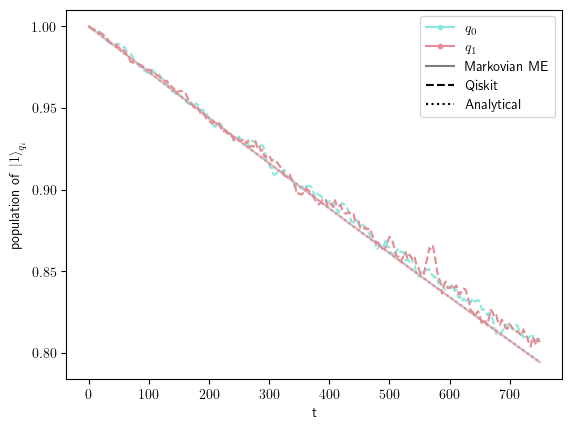

In [6]:
# Constants needed for the analytical solution

delta = [ x - omega_c for x in omega_m ]
omega_eff = [ omega_m[i] + (delta[i]*(g[i]**2))/((0.5*kappa[0])**2 + delta[i]**2) for i in range(n) ]
g_eff = [ (0.5*g[i]*g[i+1]*(delta[i] + delta[i+1]))/((kappa[0]/2)**2 + delta[i]*delta[i+1]) for i in range(n-1) ]
gamma_eff = [ gamma[i] + (kappa[0]*(g[i]**2))/((0.5*kappa[0])**2 + delta[i]**2) for i in range(n) ]
gamma_cross = [ (g[i]*g[i+1]*(kappa[0]))/((kappa[0]/2)**2 + delta[i]*delta[i+1]) for i in range(n-1)]  
gamma_plus = [(gamma_eff[i] + gamma_eff[i+1])/2 + gamma_cross[i] for i in range(n-1)]
gamma_minus = [(gamma_eff[i] + gamma_eff[i+1])/2 - gamma_cross[i] for i in range(n-1)]


import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600
from generate_complementary_colors import generate_complementary_colors

colors = generate_complementary_colors(n, 'pastel', 'turquoise')

for key in evs_qc:

    plt.plot(t, evs_markov[key], linestyle = 'solid', alpha = 0.5, color = colors[int(key)])
    #plt.plot(t, evs_diagonal[key], linestyle = 'solid', color = colors[int(key)])
    plt.plot(t, evs_qc[key], linestyle = 'dashed', color = colors[int(key)])
    #plt.plot(t, 1/2*((gamma_plus[0]/gamma_minus[0])*(1 - np.exp(-gamma_minus[0]*t)) + (gamma_minus[0]/gamma_plus[0])*(1-np.exp(-gamma_plus[0]*t))) + np.exp(-(gamma_plus[0] + gamma_minus[0])*t) , linestyle = 'dotted', color = colors[int(key)])
    #plt.plot(t, (gamma_plus[0]/gamma_minus[0])*(1 - np.exp(-gamma_minus[0]*t)) + np.exp(-(gamma_plus[0] + gamma_minus[0])*t) , linestyle = 'dotted', color = colors[int(key)])
    plt.plot(t, 1/2*((gamma_plus[0]/gamma_minus[0])*(np.exp(-gamma_plus[0]*t) - np.exp(-(gamma_plus[0] + gamma_minus[0])*t)) + (gamma_minus[0]/gamma_plus[0])*(np.exp(-gamma_minus[0]*t) - np.exp(-(gamma_plus[0] + gamma_minus[0])*t))) + np.exp(-(gamma_plus[0] + gamma_minus[0])*t) , linestyle = 'dotted', color = colors[int(key)])
    plt.plot(np.NaN, np.NaN, marker = '.', color = colors[int(key)], label = f'$q_{int(key)}$')

plt.plot(np.NaN, np.NaN, color = 'black', alpha = 0.5, linestyle = 'solid', label = 'Markovian ME')
#plt.plot(np.NaN, np.NaN, color = 'black', linestyle = 'solid', label = 'Diagonal approximated ME')
plt.plot(np.NaN, np.NaN, color = 'black', linestyle = 'dashed', label = 'Qiskit')
plt.plot(np.NaN, np.NaN, color = 'black', linestyle = 'dotted', label = 'Analytical')
plt.xlabel('t')
plt.ylabel('population of $\\left.|1 \\right>_{q_i}$')
plt.legend()
#plt.savefig('two_qubit_real_backend_sim_one_trotter')
plt.show()

In [7]:
gamma_minus

[8.000000000000194e-07]

In [8]:
gamma_plus

[0.0005613095541401274]

Diagonalization of 2 qubit Hamiltonian

In [96]:
import sympy as sp
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
from sympy import Symbol, sqrt
import numpy as np

omega_1 = Symbol('$w_{1}$')
omega_2 = Symbol('$w_{2}$')
g = Symbol('$g$')

#omega_1 =  2
#omega_2 = 4

H = Matrix([[0, 0, 0, 0],[0, omega_2, g, 0], [0, g, omega_1, 0],[0, 0, 0, omega_1 + omega_2]])
H

Matrix([
[0,       0,       0,                 0],
[0, $w_{2}$,     $g$,                 0],
[0,     $g$, $w_{1}$,                 0],
[0,       0,       0, $w_{1}$ + $w_{2}$]])

In [65]:
sp.simplify(A.transpose()*A)

Matrix([
[1, 0,                                              0,                                              0],
[0, 1,                                              0,                                              0],
[0, 0, (4*$g$**2 - sqrt(4*$g$**2 + 1) + 1)/(2*$g$**2),                                              0],
[0, 0,                                              0, (4*$g$**2 + sqrt(4*$g$**2 + 1) + 1)/(2*$g$**2)]])

In [51]:
P = Matrix([[1, 0, 0, 0], [0, -1/np.sqrt(2), 1/np.sqrt(2), 0], [0, 1/np.sqrt(2), 1/np.sqrt(2), 0], [0, 0, 0, 1]])
P*P.transpose()

Matrix([
[1,   0,   0, 0],
[0, 1.0,   0, 0],
[0,   0, 1.0, 0],
[0,   0,   0, 1]])

In [55]:
Matrix.eye(P.rows)

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [53]:
P*P.H

Matrix([
[1,   0,   0, 0],
[0, 1.0,   0, 0],
[0,   0, 1.0, 0],
[0,   0,   0, 1]])

In [97]:
columns = []
M = sp.eye(4,1)
for i in range(4):
    eigenvec = H.eigenvects()[i][2][0]
    norm = sqrt(sum(sp.matrices.dense.matrix_multiply_elementwise(eigenvec, eigenvec)))
    M = M.col_insert(i, eigenvec/norm)

M.col_del(0)
print(M)

Matrix([[0, 0, 0, 1], [0, (-$w_{1}$/$g$ + ($w_{1}$/2 + $w_{2}$/2 - sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2)/2)/$g$)/sqrt((-$w_{1}$/$g$ + ($w_{1}$/2 + $w_{2}$/2 - sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2)/2)/$g$)**2 + 1), (-$w_{1}$/$g$ + ($w_{1}$/2 + $w_{2}$/2 + sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2)/2)/$g$)/sqrt((-$w_{1}$/$g$ + ($w_{1}$/2 + $w_{2}$/2 + sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2)/2)/$g$)**2 + 1), 0], [0, 1/sqrt((-$w_{1}$/$g$ + ($w_{1}$/2 + $w_{2}$/2 - sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2)/2)/$g$)**2 + 1), 1/sqrt((-$w_{1}$/$g$ + ($w_{1}$/2 + $w_{2}$/2 + sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2)/2)/$g$)**2 + 1), 0], [1, 0, 0, 0]])


In [98]:
sp.simplify(M.transpose()*M)

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [32]:
print(H.diagonalize()[0])

Matrix([[1, 0, 0, 0], [0, 0, (-$w_{1}$ + $w_{2}$ - sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2))/(2*$g$), (-$w_{1}$ + $w_{2}$ + sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2))/(2*$g$)], [0, 0, 1, 1], [0, 1, 0, 0]])


Making P unitary (P_unit = P*(P^{\dag}*P)^{-1})

In [33]:
P = H.diagonalize()[0]
pdag_p = (P.transpose()*P)
powered = pdag_p**(1/2)
inverted = powered.inv()
final = P*inverted
print(sp.simplify(final))

Matrix([[1, 0, 0, 0], [0, 0, 0.707106781186548*(-$w_{1}$ + $w_{2}$ - sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2))/($g$*((4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{1}$*sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2) + $w_{2}$**2 - $w_{2}$*sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2))/$g$**2)**0.5), 0.707106781186548*(-$w_{1}$ + $w_{2}$ + sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2))/($g$*((4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ - $w_{1}$*sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2) + $w_{2}$**2 + $w_{2}$*sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2))/$g$**2)**0.5)], [0, 0, 1.4142135623731/((4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{1}$*sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2) + $w_{2}$**2 - $w_{2}$*sqrt(4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ + $w_{2}$**2))/$g$**2)**0.5, 1.4142135623731/((4*$g$**2 + $w_{1}$**2 - 2*$w_{1}$*$w_{2}$ - $w_{1}$*sqrt(4*$g$**2 + $w_

In [34]:
b = is_unitary(final)
b

False